In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
from time import sleep

website = lambda start, end: [f"https://en.wikipedia.org/wiki/UFC_{i}" for i in range(start, end+1)]
    
def get_top_level_data(end, start=20, get_fight_card_stats=False, both=True, avg_pause=.6):
    """
    
    @param end: integer
    @param start : integer
    @param get_fight_card_stats : 
    @param both : boolean
    @param avg_pause : float
    """
            
    def add_d_set(df_use, name):
        df = df_use.copy()
        df.insert(0, "Event", f"UFC{name.split('_')[-1]}")
        df.columns =["Event", "Cat", "Value", "NA"]
        return df
    
    vals = website(start, end)
    rets_df = []
    if both:
        rets_df_2 = []

    
    for j, pause in zip(vals, np.random.poisson(avg_pause, len(vals))):
        if get_fight_card_stats and not both:
            rets_df.append(add_d_set(pd.read_html(j)[2], j))
        elif get_fight_card_stats and both:
            d = pd.read_html(j)
            rets_df.append(add_d_set(d[2], j))
            rets_df_2.append(add_d_set(d[0], j))
        else:
            rets_df.append(add_d_set(pd.read_html(j)[0], j))
        sleep(pause)
    return pd.concat(rets_df, axis=0)

In [ ]:
!pip install plotly

In [4]:
d = get_top_level_data(266, 150, avg_pause=.25)

https://en.wikipedia.org/wiki/UFC_150
https://en.wikipedia.org/wiki/UFC_151
https://en.wikipedia.org/wiki/UFC_152
https://en.wikipedia.org/wiki/UFC_153
https://en.wikipedia.org/wiki/UFC_154
https://en.wikipedia.org/wiki/UFC_155
https://en.wikipedia.org/wiki/UFC_156
https://en.wikipedia.org/wiki/UFC_157
https://en.wikipedia.org/wiki/UFC_158
https://en.wikipedia.org/wiki/UFC_159
https://en.wikipedia.org/wiki/UFC_160
https://en.wikipedia.org/wiki/UFC_161
https://en.wikipedia.org/wiki/UFC_162
https://en.wikipedia.org/wiki/UFC_163
https://en.wikipedia.org/wiki/UFC_164
https://en.wikipedia.org/wiki/UFC_165
https://en.wikipedia.org/wiki/UFC_166
https://en.wikipedia.org/wiki/UFC_167
https://en.wikipedia.org/wiki/UFC_168
https://en.wikipedia.org/wiki/UFC_169
https://en.wikipedia.org/wiki/UFC_170
https://en.wikipedia.org/wiki/UFC_171
https://en.wikipedia.org/wiki/UFC_172
https://en.wikipedia.org/wiki/UFC_173
https://en.wikipedia.org/wiki/UFC_174
https://en.wikipedia.org/wiki/UFC_175
https://en.w

In [36]:
d_clean = d[d["Cat"].isin(["Total gate", "Date"])].pivot(index="Event", columns="Cat", values= "Value").dropna()
d_clean["Total gate"] = d_clean["Total gate"].apply(lambda x : str(x)[:-3])

In [ ]:
def clean_millions(x):
    if "millions" in x:
        return str(float(x.split(" ")[0])*1000000)
    return x

In [45]:
var_of_interest = "Total gate"
d_clean = d[d["Cat"].isin([var_of_interest, "Date"])].pivot(index="Event", columns="Cat", values= "Value").dropna()
d_clean[var_of_interest] = d_clean[var_of_interest].apply(lambda x : str(x)[1:-3])
d_clean[var_of_interest] = d_clean[var_of_interest].apply(lambda x: x.replace("2.5–$2.6 million", "2500000"))
d_clean[var_of_interest] = d_clean[var_of_interest].apply(clean_millions)
d_clean["Total"] = d_clean[var_of_interest].apply(lambda x : float(x.replace(",", "")))
d_clean["UFC"] = d_clean.index.str.replace("UFC", "")

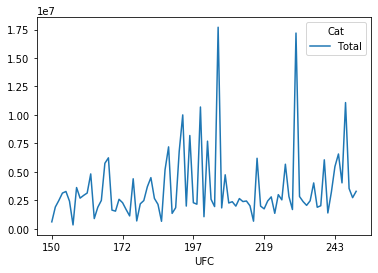

In [46]:
d_clean[["UFC", "Total"]].set_index("UFC").plot()

In [50]:
var_of_interest = "Buyrate"
d_clean = d[d["Cat"].isin([var_of_interest, "Date"])].pivot(index="Event", columns="Cat", values= "Value").dropna()
d_clean[var_of_interest] = d_clean[var_of_interest].apply(lambda x : str(x)[1:-3])
d_clean[var_of_interest] = d_clean[var_of_interest].apply(lambda x: x.replace("2.5–$2.6 million", "2500000"))
d_clean[var_of_interest] = d_clean[var_of_interest].apply(clean_millions)
d_clean["Total"] = d_clean[var_of_interest].apply(lambda x : float(x.replace(",", "")))
d_clean["UFC"] = d_clean.index.str.replace("UFC", "")

ValueError: could not convert string to float: '05000[2]'

In [51]:
d_clean

Cat,Buyrate,Date
Event,,
UFC150,"90,000","August 11, 2012"
UFC152,"50,000","September 22, 2012"
UFC153,"10,000","October 13, 2012"
UFC154,"00,000","November 17, 2012"
UFC155,"90,000","December 29, 2012"
...,...,...
UFC253,"00,000","September 27, 2020"
UFC254,"75,000","October 24, 2020"
UFC257,",600,000","January 24, 2021"
